In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
obesity_file_path = 'C:/Users/Admin/Downloads/2020/Obesity.csv'

obesity_data = pd.read_csv(obesity_file_path)
print(obesity_data.columns)

Index(['Height', 'Weight', 'family_history_with_overweight', 'SCC',
       'MTRANS_Walking', 'FAVC_z', 'FCVC_minmax', 'NCP_z', 'CAEC_minmax',
       'CH2O_minmax', 'FAF_minmax', 'TUE_z', 'CALC_z', 'Age_bin_minmax',
       'NObeyesdad'],
      dtype='object')


In [11]:
y=obesity_data.NObeyesdad
feature_columns = ['Height','Weight','family_history_with_overweight','SCC','FAVC_z','FCVC_minmax']
X = obesity_data[feature_columns]

obesity_model = DecisionTreeRegressor(random_state=1)
obesity_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [12]:
print('First in-sample predictions : ', obesity_model.predict(X.head()))
print('Actual target values for those people : ', y.head().tolist())

First in-sample predictions :  [1. 1. 1. 2. 3.]
Actual target values for those people :  [1, 1, 1, 2, 3]


In [13]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

obesity_model = DecisionTreeRegressor(random_state=1)
obesity_model.fit(train_X, train_y)

val_predictions = obesity_model.predict(val_X)
print(val_predictions)
print(val_y)

[4. 2. 2. 2. 2. 2. 5. 2. 0. 0. 2. 4. 6. 0. 3. 0. 0. 5. 6. 1. 6. 6. 5. 0.
 3. 6. 5. 2. 6. 6. 6. 2. 6. 1. 3. 0. 2. 1. 0. 5. 4. 2. 1. 6. 3. 5. 0. 4.
 3. 0. 0. 1. 2. 4. 4. 4. 4. 1. 5. 5. 2. 4. 1. 4. 2. 0. 2. 4. 2. 2. 3. 5.
 0. 5. 5. 6. 2. 5. 4. 6. 5. 1. 1. 4. 3. 2. 5. 2. 3. 4. 0. 4. 3. 5. 1. 4.
 0. 4. 4. 5. 4. 0. 1. 0. 6. 6. 4. 1. 4. 6. 3. 5. 3. 6. 2. 3. 5. 0. 6. 4.
 4. 0. 4. 1. 2. 4. 6. 6. 2. 6. 3. 5. 3. 1. 5. 3. 3. 1. 4. 2. 6. 3. 0. 0.
 5. 2. 3. 6. 1. 2. 1. 2. 5. 2. 0. 2. 4. 0. 6. 5. 4. 4. 1. 4. 5. 6. 2. 1.
 6. 5. 1. 6. 5. 0. 5. 5. 2. 1. 3. 1. 1. 4. 6. 3. 3. 5. 1. 2. 0. 1. 1. 5.
 3. 3. 2. 3. 0. 1. 6. 3. 6. 6. 5. 0. 4. 2. 2. 1. 2. 3. 5. 2. 3. 0. 2. 6.
 2. 6. 6. 1. 3. 3. 2. 2. 4. 5. 2. 4. 3. 0. 5. 6. 4. 3. 2. 6. 3. 5. 1. 4.
 6. 1. 6. 3. 6. 1. 4. 5. 1. 5. 4. 0. 6. 6. 0. 4. 6. 0. 3. 5. 0. 5. 1. 2.
 0. 5. 3. 3. 5. 6. 5. 0. 6. 1. 4. 6. 4. 4. 0. 6. 2. 0. 0. 5. 0. 0. 6. 4.
 1. 1. 0. 2. 0. 5. 1. 1. 6. 5. 1. 3. 4. 0. 4. 3. 3. 3. 3. 1. 1. 0. 3. 2.
 5. 4. 5. 2. 6. 5. 1. 3. 5. 2. 3. 3. 3. 5. 3. 1. 0.

In [14]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y,val_predictions)

print(val_mae)

0.032567049808429116


In [15]:
from sklearn.model_selection import train_test_split

X = obesity_data.drop('NObeyesdad', axis=1)
y = obesity_data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9641148325358851
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.88      0.95      0.91        66
           2       0.95      0.93      0.94        56
           3       0.96      0.94      0.95        48
           4       1.00      0.96      0.98        71
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        56

    accuracy                           0.96       418
   macro avg       0.97      0.96      0.96       418
weighted avg       0.97      0.96      0.96       418



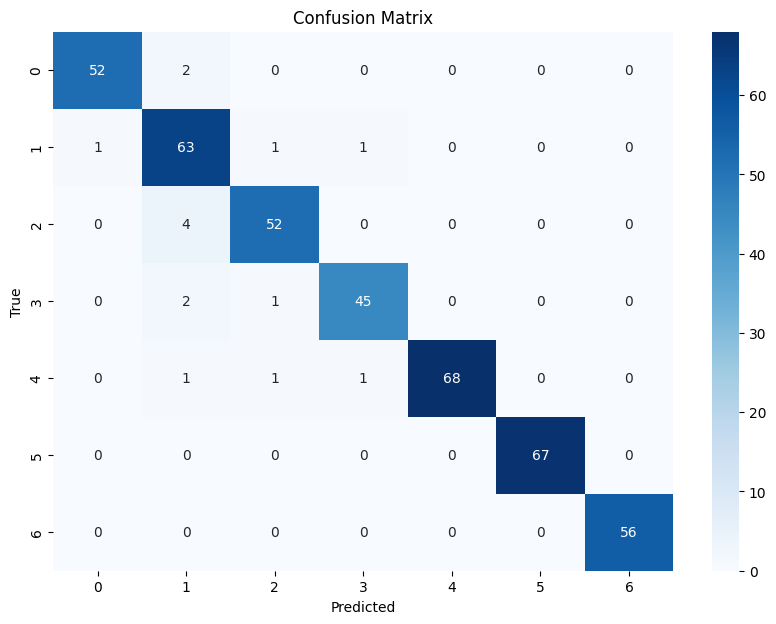

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
import joblib

# Save your trained model
joblib.dump(clf, 'C:/Users/Admin/Downloads/2020/obesity_model.pkl')

['C:/Users/Admin/Downloads/2020/obesity_model.pkl']